In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt

In [2]:
from Data_cleaning import clean_paloalto

In [3]:
c = clean_paloalto() 
data = c.clean_data()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (29,30,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\User\OneDrive - Danmarks Tekniske Universitet\SAS_030919\6. Semester\BSc\Bachelor2021\Data_cleaning.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Charge Duration (mins)"][df["Charge Duration (mins)"]==" -   "]=0


In [4]:
data['Charging Time (hh:mm:ss)'] = data['Charging Time (hh:mm:ss)'] - dt.datetime(1900, 1, 1, 0, 0, 0)
data['Total Duration (hh:mm:ss)'] = data['Total Duration (hh:mm:ss)'] - dt.datetime(1900, 1, 1, 0, 0, 0)
data['Charging Time (hh:mm:ss)'] = data['Charging Time (hh:mm:ss)'].round('min')
data['Total Duration (hh:mm:ss)'] = data['Total Duration (hh:mm:ss)'].round('min')

In [5]:
data['StartYear'] = data['Start Date'].dt.year
df16 = data[data['StartYear'] == 2016]

In [6]:
np.sqrt(100**2 + 100**2)

141.4213562373095

In [7]:
data.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Address 1', 'City', 'State/Province',
       'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code',
       'Park Duration (mins)', 'Charge Duration (mins)', 'ID', 'Pairlocation',
       'StartYear'],
      dtype='object')

In [8]:
print(data['Port Type'].unique())
print(data['Plug Type'].unique())
print(data['Port Number'].unique())

['Level 2' 'Level 1']
['J1772' 'NEMA 5-20R']
[2 1]


In [9]:
data['Currency'].unique()

array(['USD', 'EUR', 'MXN', 'CAD'], dtype=object)

In [10]:
data[((data['Currency'] != 'USD') & (data['Fee'] != 0))]

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear
127255,PALO ALTO CA / BRYANT #5,0024B10000026D51,City of Palo Alto,2017-08-02 15:17:00,PDT,2017-08-02 17:48:00,PDT,0 days 02:31:00,0 days 01:43:00,9.854,...,MXN,2.62,Plug Out at Vehicle,198,64000,151,103.0,32,37.4467x-122.1622,2017
127869,PALO ALTO CA / BRYANT #5,0024B10000026D51,City of Palo Alto,2017-08-08 11:50:00,PDT,2017-08-08 14:15:00,PDT,0 days 02:24:00,0 days 00:56:00,5.320,...,MXN,2.85,Plug Out at Vehicle,218,64000,144,56.0,32,37.4467x-122.1622,2017
129401,PALO ALTO CA / MPL #4,000D6F0004B8A128,City of Palo Alto,2017-08-22 18:25:00,PDT,2017-08-22 21:13:00,PDT,0 days 02:48:00,0 days 02:48:00,9.184,...,EUR,2.11,Plug Out at Vehicle,1503451514,95120,168,168.0,18,37.4221x-122.1135,2017
129623,PALO ALTO CA / MPL #4,000D6F0004B8A128,City of Palo Alto,2017-08-24 18:29:00,PDT,2017-08-24 21:25:00,PDT,0 days 02:56:00,0 days 02:47:00,8.579,...,EUR,1.97,Plug Out at Vehicle,1503624534,95120,176,167.0,18,37.4221x-122.1135,2017


In [11]:
data['Ended By'].unique()

array(['Plug Out at Vehicle', 'Customer', 'CPS Server',
       'Plug Removed While Rebooting', 'Final GFCI Tripped', 'Door',
       'Plug Out at Station', 'Door Open', 'Holster Plugin', 'Unknown',
       'Outlet Unreachable', 'OCD', 'Final 4-strikes GFCI trip'],
      dtype=object)

In [12]:
uniS = len(data['Station Name'].unique()) 
print(f'Unique Station Names: {uniS}')

uniMAC = len(data['MAC Address'].unique()) 
print(f'Unique MAC Addresses: {uniMAC}')

uniPair = len(data['Pairlocation'].unique()) 
print(f'Unique Pairlocations: {uniPair}')

Unique Station Names: 27
Unique MAC Addresses: 40
Unique Pairlocations: 33


In [13]:
test = data.groupby(['Station Name', 'Plug Type', 'Start Date'])['Energy (kWh)'].sum()
test

Station Name               Plug Type  Start Date         
PALO ALTO CA / BRYANT #1   J1772      2011-10-13 12:49:00     1.630508
                                      2011-10-13 18:49:00     6.631544
                                      2011-10-14 14:46:00     6.259466
                                      2011-10-15 12:28:00     4.622894
                                      2011-10-17 13:28:00     4.023361
                                                               ...    
PALO ALTO CA / WEBSTER #3  J1772      2017-12-28 17:03:00    12.746000
                                      2017-12-29 10:08:00    11.821000
                                      2017-12-30 09:05:00    11.355000
                                      2017-12-31 09:54:00    12.838000
                                      2017-12-31 16:12:00     7.758000
Name: Energy (kWh), Length: 142857, dtype: float64

In [14]:
testX = data.groupby(['MAC Address', 'Pairlocation', 'Station Name'])['Energy (kWh)'].sum()
testX

MAC Address       Pairlocation       Station Name                  
000D6F00009D9A1B  37.4466x-122.1623  PALO ALTO CA / BRYANT #1          18517.179552
000D6F00009DCC2B  37.4455x-122.1388  PALO ALTO CA / RINCONADA LIB 1     4685.007312
                  37.4455x-122.1389  PALO ALTO CA / RINCONADA LIB 1    34058.650385
000D6F00009DCFC3  37.4465x-122.1621  PALO ALTO CA / BRYANT #2          64908.343606
000D6F00009ED39E  37.4446x-122.1603  PALO ALTO CA / HAMILTON #2        55899.339393
                  37.4466x-122.1621  PALO ALTO CA / BRYANT #3          20971.677064
000D6F00009ED727  37.4455x-122.1389  PALO ALTO CA / RINCONADA LIB 2    34382.237606
000D6F0000A20D9E  37.4464x-122.1623  PALO ALTO CA / BRYANT #1            617.002213
                  37.4466x-122.1623  PALO ALTO CA / BRYANT #1          59704.042330
000D6F0000A20F47  37.4437x-122.1629  PALO ALTO CA / HIGH #4            53512.120308
000D6F0000A2108E  37.4464x-122.1623  PALO ALTO CA / BRYANT #2            508.500093
        

In [15]:
test2 = data.groupby(['Station Name', 'MAC Address'])['Energy (kWh)'].sum()
test2

Station Name                    MAC Address     
PALO ALTO CA / BRYANT #1        000D6F00009D9A1B    18517.179552
                                000D6F0000A20D9E    60321.044543
PALO ALTO CA / BRYANT #2        000D6F00009DCFC3    64908.343606
                                000D6F0000A2108E    17708.751271
PALO ALTO CA / BRYANT #3        000D6F00009ED39E    20971.677064
PALO ALTO CA / BRYANT #4        0024B10000026D37     6059.468000
PALO ALTO CA / BRYANT #5        0024B10000026D51     7901.283000
PALO ALTO CA / BRYANT #6        0024B10000026B43     7499.949000
PALO ALTO CA / CAMBRIDGE #1     0024B10000021329    38623.347301
PALO ALTO CA / CAMBRIDGE #2     0024B100000213B7    37550.431954
PALO ALTO CA / HAMILTON #1      000D6F00015A9D76    79395.167810
PALO ALTO CA / HAMILTON #2      000D6F00009ED39E    55899.339393
                                0024B100000203AD     4459.471000
                                0024B10000021331    48871.201872
                                0024B1000

In [16]:
test3 = data.groupby(['Pairlocation','Station Name'])['Energy (kWh)'].sum()
test3

Pairlocation       Station Name                  
37.4221x-122.1125  PALO ALTO CA / MPL #1              7996.577157
37.4221x-122.1126  PALO ALTO CA / MPL #3             10769.379942
37.4221x-122.1135  PALO ALTO CA / MPL #4             38835.321387
                   PALO ALTO CA / MPL #5             41484.821932
                   PALO ALTO CA / MPL #6             47201.184030
37.4222x-122.1125  PALO ALTO CA / MPL #2             12042.056720
37.4262x-122.1461  PALO ALTO CA / CAMBRIDGE #1       33573.666348
                   PALO ALTO CA / CAMBRIDGE #2       32372.835156
37.4273x-122.1457  PALO ALTO CA / CAMBRIDGE #1        5049.680953
                   PALO ALTO CA / CAMBRIDGE #2        5177.596798
37.4283x-122.1442  PALO ALTO CA / TED THOMPSON #1    45582.524331
37.4431x-122.163   PALO ALTO CA / HIGH #2            20578.835000
                   PALO ALTO CA / HIGH #3            22576.252000
37.4431x-122.1632  PALO ALTO CA / HIGH #4              160.269000
37.4432x-122.1631  PALO AL

In [17]:
test4 = data.groupby(['Station Name', 'Pairlocation'])['Energy (kWh)'].sum()
test4

Station Name                    Pairlocation     
PALO ALTO CA / BRYANT #1        37.4464x-122.1623      617.002213
                                37.4466x-122.1623    78221.221882
PALO ALTO CA / BRYANT #2        37.4464x-122.1623      508.500093
                                37.4465x-122.1621    82108.594784
PALO ALTO CA / BRYANT #3        37.4466x-122.1621    20971.677064
PALO ALTO CA / BRYANT #4        37.4468x-122.1624     6059.468000
PALO ALTO CA / BRYANT #5        37.4467x-122.1622     7901.283000
PALO ALTO CA / BRYANT #6        37.4467x-122.1622     7499.949000
PALO ALTO CA / CAMBRIDGE #1     37.4262x-122.1461    33573.666348
                                37.4273x-122.1457     5049.680953
PALO ALTO CA / CAMBRIDGE #2     37.4262x-122.1461    32372.835156
                                37.4273x-122.1457     5177.596798
PALO ALTO CA / HAMILTON #1      37.4445x-122.1604    75043.936582
                                37.4446x-122.1603     4351.231228
PALO ALTO CA / HAMILTON #2

In [18]:
sumconsumption = df16.groupby(['Pairlocation','MAC Address'])['Energy (kWh)'].sum()
#print(max(sumconsumption))
#print(sumconsumption)
sumconsumption

Pairlocation       MAC Address     
37.4221x-122.1125  000D6F000154FFDB      113.719360
                   000D6F0004B89F68     3339.552195
37.4221x-122.1126  000D6F00015B906A     4269.087412
37.4221x-122.1135  000D6F000154FFC5    16827.715245
                   000D6F00015B7509    18538.468437
                   000D6F0004B8A128    16032.264397
37.4222x-122.1125  000D6F000154EF9A     4348.937078
37.4262x-122.1461  0024B10000021329    13859.895348
                   0024B100000213B7    13624.167156
37.4273x-122.1457  0024B10000021329     5049.680953
                   0024B100000213B7     5177.596798
37.4283x-122.1442  0024B10000021323    21250.437331
37.4436x-122.1628  0024B100000210FE    30400.605671
37.4437x-122.1629  000D6F0000A20F47     3671.761538
                   000D6F00015B9402     9662.153440
37.4444x-122.1599  0024B10000021331    29934.366872
37.4445x-122.1604  000D6F00015A9D76    15338.749379
37.4446x-122.1603  000D6F00009ED39E      518.213175
37.4455x-122.1389  000D6F000

In [19]:
df16one = df16[df16['Station Name'] == 'PALO ALTO CA / WEBSTER #2']
#df16one = df16[df16['MAC Address'] == '0024B100000207FA']

df16one.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear
49698,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.034643,...,USD,0.0,Customer,1216,94024,230,92.0,17,37.4482x-122.1582,2016
49710,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.427662,...,USD,0.0,Plug Out at Vehicle,1219,94025,225,225.0,17,37.4482x-122.1582,2016
49732,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 22:43:00,PST,2016-01-02 10:31:00,PST,0 days 11:48:00,0 days 01:51:00,10.752058,...,USD,0.0,Plug Out at Vehicle,1451717005,94301,708,111.0,17,37.4482x-122.1582,2016
49736,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 07:09:00,PST,2016-01-02 09:38:00,PST,0 days 02:29:00,0 days 02:29:00,11.160776,...,USD,0.0,Plug Out at Vehicle,1220,94303,149,149.0,17,37.4482x-122.1582,2016
49745,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 10:29:00,PST,2016-01-02 13:05:00,PST,0 days 02:36:00,0 days 02:36:00,10.298505,...,USD,0.0,Plug Out at Vehicle,1221,95123,156,156.0,17,37.4482x-122.1582,2016


In [20]:
df16one['StartSlot'] = df16one['Start Date'].dt.floor("2H")#apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, 24*(dt.hour // 24))) #,15*(dt.minute // 15)))
#df16one['EndSlot'] = df16one['End Date'].dt.ceil("2H")

<ipython-input-20-c7fa92609f62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16one['StartSlot'] = df16one['Start Date'].dt.floor("2H")#apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, 24*(dt.hour // 24))) #,15*(dt.minute // 15)))


In [21]:
df16one['ConPerMin'] = df16one['Energy (kWh)'] / df16one['Charge Duration (mins)']

<ipython-input-21-dc299c085e8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16one['ConPerMin'] = df16one['Energy (kWh)'] / df16one['Charge Duration (mins)']


In [22]:
df16one = df16one.replace([np.inf], 0);

In [23]:
df16one.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Address 1', 'City', 'State/Province',
       'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code',
       'Park Duration (mins)', 'Charge Duration (mins)', 'ID', 'Pairlocation',
       'StartYear', 'StartSlot', 'ConPerMin'],
      dtype='object')

In [200]:
result = pd.DataFrame()


start = time.time()


for index, row in df16one.iterrows():

    dftemp = pd.DataFrame(row).T
    dftemp.insert(0, 'Slot', dftemp['StartSlot'])
    
    if dftemp.iloc[-1]['Start Date'] + dftemp.iloc[-1]['Charging Time (hh:mm:ss)'] > (dftemp.iloc[-1]['StartSlot'] + dt.timedelta(hours=2)):
        dftemp.insert(1, 'ChargeMin', (dftemp['StartSlot'] + dt.timedelta(hours=2)) - dftemp['Start Date'])
        dftemp.insert(2, 'TimeLeftCharge', dftemp['Charging Time (hh:mm:ss)'] - dftemp['ChargeMin'])
    else: 
        dftemp.insert(1, 'ChargeMin', dftemp.iloc[-1]['Charging Time (hh:mm:ss)'])
        dftemp.insert(2, 'TimeLeftCharge', dt.timedelta(seconds=0))

    if dftemp.iloc[-1]['Start Date'] + dftemp.iloc[-1]['Total Duration (hh:mm:ss)'] > (dftemp.iloc[-1]['StartSlot'] + dt.timedelta(hours=2)):
        dftemp.insert(3, 'ParkMin', (dftemp['StartSlot'] + dt.timedelta(hours=2)) - dftemp['Start Date'])
        dftemp.insert(4, 'TimeLeftPark', dftemp['Total Duration (hh:mm:ss)'] - dftemp['ChargeMin'])
    else: 
        dftemp.insert(3, 'ParkMin', dftemp.iloc[-1]['Total Duration (hh:mm:ss)'])
        dftemp.insert(4, 'TimeLeftPark', dt.timedelta(seconds=0))                      
 
    while dftemp.iloc[-1]['TimeLeftPark'] > dt.timedelta(seconds=0):
        dftemp2 = pd.DataFrame(dftemp.iloc[-1]).T
        dftemp2['Slot'] = dftemp2['Slot'] + dt.timedelta(hours=2)

        if dftemp2.iloc[-1]['TimeLeftCharge'] > dt.timedelta(hours=2):
            dftemp2['ChargeMin'] = dt.timedelta(hours=2)
            dftemp2['TimeLeftCharge'] = dftemp2['TimeLeftCharge'] - dt.timedelta(hours=2)
        else: 
            dftemp2['ChargeMin'] = dftemp2['TimeLeftCharge']
            dftemp2['TimeLeftCharge'] = dt.timedelta(seconds=0)
            
        if dftemp2.iloc[-1]['TimeLeftPark'] > dt.timedelta(hours=2):
            dftemp2['ParkMin'] = dt.timedelta(hours=2)
            dftemp2['TimeLeftPark'] = dftemp2['TimeLeftPark'] - dt.timedelta(hours=2)
        else: 
            dftemp2['ParkMin'] = dftemp2['TimeLeftPark']
            dftemp2['TimeLeftPark'] = dt.timedelta(seconds=0)        
            
            
        dftemp = pd.concat([dftemp, dftemp2])    

    final = dftemp.reset_index() 
    result = pd.concat([result, final])
    
end = time.time()
print(end - start)

102.47090530395508


## Rewriting to .apply

In [56]:
def discretize(series):
    dftemp = pd.DataFrame(series).T
    dftemp.insert(0, 'Slot', dftemp['StartSlot'])
    
    if dftemp.iloc[-1]['Start Date'] + dftemp.iloc[-1]['Charging Time (hh:mm:ss)'] > (dftemp.iloc[-1]['StartSlot'] + dt.timedelta(hours=2)):
        dftemp.insert(1, 'ChargeMin', (dftemp['StartSlot'] + dt.timedelta(hours=2)) - dftemp['Start Date'])
        dftemp.insert(2, 'TimeLeftCharge', dftemp['Charging Time (hh:mm:ss)'] - dftemp['ChargeMin'])
    else: 
        dftemp.insert(1, 'ChargeMin', dftemp.iloc[-1]['Charging Time (hh:mm:ss)'])
        dftemp.insert(2, 'TimeLeftCharge', dt.timedelta(seconds=0))

    if dftemp.iloc[-1]['Start Date'] + dftemp.iloc[-1]['Total Duration (hh:mm:ss)'] > (dftemp.iloc[-1]['StartSlot'] + dt.timedelta(hours=2)):
        dftemp.insert(3, 'ParkMin', (dftemp['StartSlot'] + dt.timedelta(hours=2)) - dftemp['Start Date'])
        dftemp.insert(4, 'TimeLeftPark', dftemp['Total Duration (hh:mm:ss)'] - dftemp['ChargeMin'])
    else: 
        dftemp.insert(3, 'ParkMin', dftemp.iloc[-1]['Total Duration (hh:mm:ss)'])
        dftemp.insert(4, 'TimeLeftPark', dt.timedelta(seconds=0))                      
 
    while dftemp.iloc[-1]['TimeLeftPark'] > dt.timedelta(seconds=0):
        dftemp2 = pd.DataFrame(dftemp.iloc[-1]).T
        dftemp2['Slot'] = dftemp2['Slot'] + dt.timedelta(hours=2)

        if dftemp2.iloc[-1]['TimeLeftCharge'] > dt.timedelta(hours=2):
            dftemp2['ChargeMin'] = dt.timedelta(hours=2)
            dftemp2['TimeLeftCharge'] = dftemp2['TimeLeftCharge'] - dt.timedelta(hours=2)
        else: 
            dftemp2['ChargeMin'] = dftemp2['TimeLeftCharge']
            dftemp2['TimeLeftCharge'] = dt.timedelta(seconds=0)
            
        if dftemp2.iloc[-1]['TimeLeftPark'] > dt.timedelta(hours=2):
            dftemp2['ParkMin'] = dt.timedelta(hours=2)
            dftemp2['TimeLeftPark'] = dftemp2['TimeLeftPark'] - dt.timedelta(hours=2)
        else: 
            dftemp2['ParkMin'] = dftemp2['TimeLeftPark']
            dftemp2['TimeLeftPark'] = dt.timedelta(seconds=0)        
            
            
        dftemp = pd.concat([dftemp, dftemp2])    

    final = dftemp.reset_index() 
    result = pd.concat([result, final])
    
    return result

In [179]:
test

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear,StartSlot,ConPerMin
49698,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,0 days 03:50:00,0 days 01:32:00,3.034643,...,Customer,1216,94024,230,92.0,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,0.032985
49710,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,0 days 03:45:00,0 days 03:45:00,12.427662,...,Plug Out at Vehicle,1219,94025,225,225.0,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,0.055234


In [191]:
#https://stackoverflow.com/questions/44573962/python-apply-function-to-each-row-of-a-pandas-dataframe-and-return-new-data-f
def funcX(row):
    dftemp = pd.DataFrame(row).T
    dftemp.insert(0, 'Slot', dftemp['StartSlot'])
    return dftemp


In [187]:
test = df16one.iloc[0:2]
#print(isinstance(test, pd.Series))

In [197]:
test.apply(lambda row: funcX(row), axis=1)


49698                         Slot               Statio...
49710                         Slot               Statio...
dtype: object

In [175]:
#test.apply(funcX)
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])

df.apply(funcX, axis=1, result_type='expand')


,A,B
0,9,19
1,9,19
2,9,19


In [97]:
result = pd.DataFrame()
test.apply(discretize)

ValueError: DataFrame constructor not properly called!

""


In [25]:
result['ChargeMin'] = result['ChargeMin'] / np.timedelta64(1, 's') / 60

In [26]:
result.insert(3, 'EnergyConsumed', result['ChargeMin'] * result['ConPerMin'].astype(float))

In [27]:
result.head()

,index,Slot,ChargeMin,EnergyConsumed,TimeLeftCharge,ParkMin,TimeLeftPark,Station Name,MAC Address,Org Name,...,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear,StartSlot,ConPerMin
0,49698,2016-01-01 10:00:00,12.0,0.395823,0 days 01:20:00,0 days 00:12:00,0 days 03:38:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,...,Customer,1216,94024,230,92,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,0.0329853
1,49698,2016-01-01 12:00:00,80.0,2.638820,0 days 00:00:00,0 days 02:00:00,0 days 01:38:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,...,Customer,1216,94024,230,92,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,0.0329853
2,49698,2016-01-01 14:00:00,0.0,0.000000,0 days 00:00:00,0 days 01:38:00,0 days 00:00:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,...,Customer,1216,94024,230,92,17,37.4482x-122.1582,2016,2016-01-01 10:00:00,0.0329853
0,49710,2016-01-01 12:00:00,17.0,0.938979,0 days 03:28:00,0 days 00:17:00,0 days 03:28:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,...,Plug Out at Vehicle,1219,94025,225,225,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,0.0552341
1,49710,2016-01-01 14:00:00,120.0,6.628086,0 days 01:28:00,0 days 02:00:00,0 days 01:28:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,...,Plug Out at Vehicle,1219,94025,225,225,17,37.4482x-122.1582,2016,2016-01-01 12:00:00,0.0552341


In [28]:
dfslot = result.groupby("Slot").sum()
dfslot = dfslot.drop(['index'], axis = 1);

In [29]:
dfslot.head()

,ChargeMin,EnergyConsumed
Slot,,
2016-01-01 10:00:00,12.0,0.395823
2016-01-01 12:00:00,97.0,3.577799
2016-01-01 14:00:00,120.0,6.628086
2016-01-01 16:00:00,88.0,4.860597
2016-01-01 22:00:00,77.0,7.458635


In [30]:
testi = dfslot.merge(df16one[['StartSlot', 'Plug Type', 'Fee']], left_on='Slot', right_on = 'StartSlot')
testi = testi.set_index('StartSlot')
testi

,ChargeMin,EnergyConsumed,Plug Type,Fee
StartSlot,,,,
2016-01-01 10:00:00,12.0,0.395823,J1772,0.0
2016-01-01 12:00:00,97.0,3.577799,J1772,0.0
2016-01-01 22:00:00,77.0,7.458635,J1772,0.0
2016-01-02 06:00:00,51.0,3.820131,J1772,0.0
2016-01-02 10:00:00,91.0,6.007461,J1772,0.0
...,...,...,...,...
2016-12-31 14:00:00,130.0,12.730440,J1772,0.0
2016-12-31 14:00:00,130.0,12.730440,J1772,0.0
2016-12-31 16:00:00,187.0,17.591753,J1772,0.0


In [31]:
testi['Plug Type'].unique()

array(['J1772'], dtype=object)

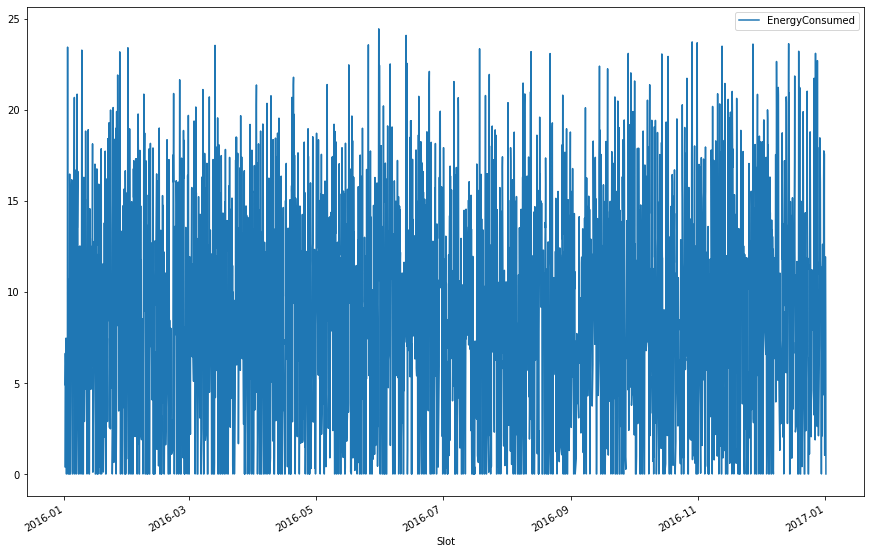

In [32]:
dfslot.plot(y='EnergyConsumed', figsize=(15,10))
plt.show()

## BONUS! 

In [33]:
dfslottime = dfslot.copy()
dfslottime['TimeOnly'] = dfslottime.index.time

dfslottime = dfslottime.groupby('TimeOnly').sum()

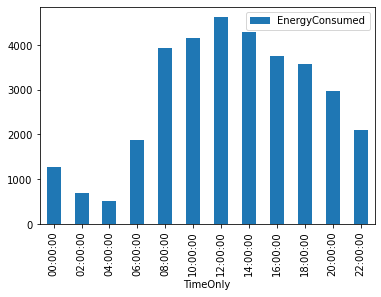

In [34]:
dfslottime.plot.bar(y="EnergyConsumed")
plt.show()

## Creating Lags! 

In [35]:
def buildLaggedFeatures(s,columns, lag=5,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [36]:
dfslot.head()

,ChargeMin,EnergyConsumed
Slot,,
2016-01-01 10:00:00,12.0,0.395823
2016-01-01 12:00:00,97.0,3.577799
2016-01-01 14:00:00,120.0,6.628086
2016-01-01 16:00:00,88.0,4.860597
2016-01-01 22:00:00,77.0,7.458635


In [37]:
lagged = buildLaggedFeatures(dfslot, dfslot.columns)

In [38]:
lagged.corr()

,ChargeMin,EnergyConsumed,ChargeMin_lag1,ChargeMin_lag2,ChargeMin_lag3,ChargeMin_lag4,ChargeMin_lag5,EnergyConsumed_lag1,EnergyConsumed_lag2,EnergyConsumed_lag3,EnergyConsumed_lag4,EnergyConsumed_lag5
ChargeMin,1.000000,0.933956,0.492890,0.178844,-0.023019,-0.187746,-0.248695,0.457584,0.144119,-0.036190,-0.174567,-0.214844
EnergyConsumed,0.933956,1.000000,0.455077,0.171256,-0.005187,-0.154885,-0.197680,0.480330,0.154222,-0.010082,-0.140119,-0.167625
ChargeMin_lag1,0.492890,0.455077,1.000000,0.492891,0.178912,-0.022966,-0.187538,0.933909,0.457717,0.144424,-0.035867,-0.174174
ChargeMin_lag2,0.178844,0.171256,0.492891,1.000000,0.492898,0.178944,-0.022819,0.455048,0.933914,0.457831,0.144565,-0.035659
ChargeMin_lag3,-0.023019,-0.005187,0.178912,0.492898,1.000000,0.492890,0.178874,0.171326,0.455014,0.933916,0.457777,0.144499
ChargeMin_lag4,-0.187746,-0.154885,-0.022966,0.178944,0.492890,1.000000,0.492850,-0.005148,0.171360,0.455034,0.933895,0.457752
ChargeMin_lag5,-0.248695,-0.197680,-0.187538,-0.022819,0.178874,0.492850,1.000000,-0.154782,-0.004903,0.171444,0.455200,0.933954
EnergyConsumed_lag1,0.457584,0.480330,0.933909,0.455048,0.171326,-0.005148,-0.154782,1.000000,0.480422,0.154493,-0.009829,-0.139839
EnergyConsumed_lag2,0.144119,0.154222,0.457717,0.933914,0.455014,0.171360,-0.004903,0.480422,1.000000,0.480488,0.154648,-0.009560
EnergyConsumed_lag3,-0.036190,-0.010082,0.144424,0.457831,0.933916,0.455034,0.171444,0.154493,0.480488,1.000000,0.480478,0.154680
